<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     65 non-null     int64 
 1   Age                         65 non-null     int64 
 2   Gender                      65 non-null     object
 3   Favorite_Book_Genre         65 non-null     object
 4   Weekly_Reading_Time(hours)  65 non-null     int64 
 5   Mood_Impact                 65 non-null     object
dtypes: int64(3), object(3)
memory usage: 3.2+ KB
The table has 65 rows and 6 columns.


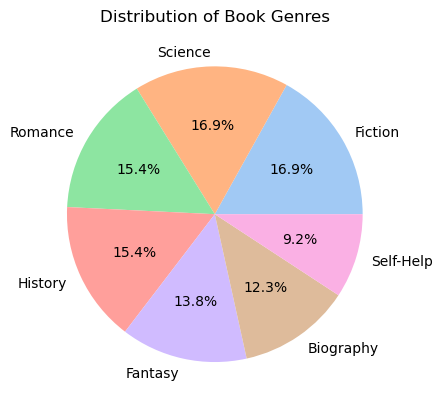

Age range of readers is between 18 and 50


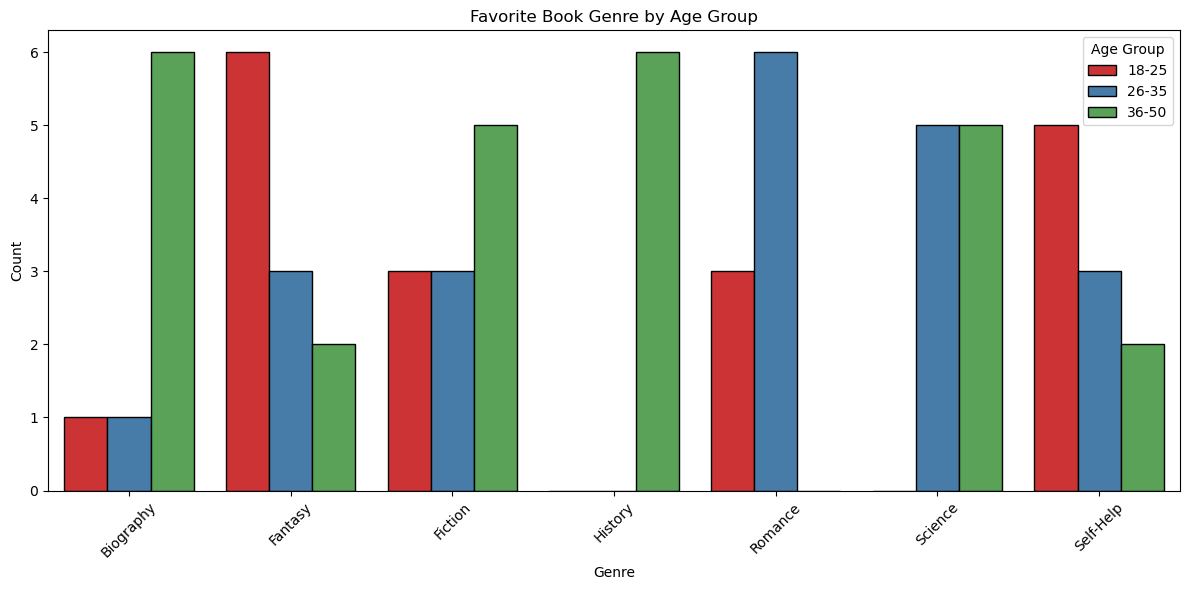

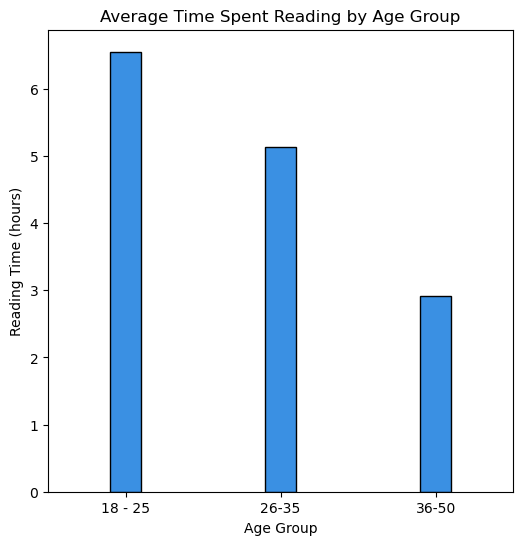

Categorical columns are: 
['Gender', 'Favorite_Book_Genre', 'Mood_Impact']

The Cardinality of the Gender column is: 2
The Cardinality of the Favorite_Book_Genre column is: 7
The Cardinality of the Mood_Impact column is: 3
Index(['User_ID', 'Age', 'Weekly_Reading_Time(hours)', 'Mood_Impact',
       'Gender_f', 'Gender_m', 'Favorite_Book_Genre_Biography',
       'Favorite_Book_Genre_Fantasy', 'Favorite_Book_Genre_Fiction',
       'Favorite_Book_Genre_History', 'Favorite_Book_Genre_Romance',
       'Favorite_Book_Genre_Science', 'Favorite_Book_Genre_Self-Help'],
      dtype='object')
  Mood_Impact  Mood_Impact_encoded
0    Positive                    2
1     Neutral                    1
2    Positive                    2
3     Neutral                    1
4    Positive                    2
5    Negative                    0
6    Positive                    2
7     Neutral                    1
8    Negative                    0
9    Positive                    2
User_ID                   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("pastel")

df = pd.read_csv('Sleep and psychological effects.csv')

df.head()

df.info()

print(f'The table has {df.shape[0]} rows and {df.shape[1]} columns.')

df.describe()

book_genres = list(df['Favorite_Book_Genre'].unique())
genre_count = list(df['Favorite_Book_Genre'].value_counts().values)

plt.pie(data=df, labels=book_genres, x=genre_count, autopct='%1.1f%%')
plt.title('Distribution of Book Genres')
plt.show()

print(f'Age range of readers is between {df["Age"].min()} and {df["Age"].max()}')
    
low_age_group = df[(df['Age'] >= 18) & (df['Age'] <= 25)]
medium_age_group = df[(df['Age'] >= 26) & (df['Age'] <= 35)]
high_age_group = df[(df['Age'] >= 36) & (df['Age'] <= 50)]

df['Favorite_Book_Genre'].unique()

low_age_genre_counts = low_age_group['Favorite_Book_Genre'].value_counts()
medium_age_genre_counts = medium_age_group['Favorite_Book_Genre'].value_counts()
high_age_genre_counts = high_age_group['Favorite_Book_Genre'].value_counts()

genres = df['Favorite_Book_Genre'].unique()

genre_counts_df = pd.DataFrame({
    '18-25': low_age_genre_counts,
    '26-35': medium_age_genre_counts,
    '36-50': high_age_genre_counts
}).fillna(0)

genre_counts_df = genre_counts_df.reset_index()
genre_counts_df.columns = ['Genre', '18-25', '26-35', '36-50']

plt.figure(figsize=(12, 6))
melted_df = genre_counts_df.melt(id_vars='Genre', var_name='Age Group', value_name='Count')

sns.barplot(x='Genre', y='Count', hue='Age Group', data=melted_df, edgecolor='black', palette='Set1')

plt.title('Favorite Book Genre by Age Group')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

#Ages are between 18 - 50
#Group Ages into 3 categories and identify each groups average reading time (hours) - low, medium, high
low_age_reading_average = low_age_group['Weekly_Reading_Time(hours)'].mean()
medium_age_reading_average = medium_age_group['Weekly_Reading_Time(hours)'].mean()
high_age_reading_average = high_age_group['Weekly_Reading_Time(hours)'].mean()

# Calculate the average reading time by age
average_reading_time = df.groupby('Age')['Weekly_Reading_Time(hours)'].mean()

reading_averages = [low_age_reading_average, medium_age_reading_average, high_age_reading_average]

#Plotting the results
plt.figure(figsize=(6, 6))
sns.barplot(x=['18 - 25', '26-35', '36-50'], y=reading_averages,
            edgecolor='black', color='dodgerblue', width=0.2)

plt.title('Average Time Spent Reading by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Reading Time (hours)')
plt.show()

categorical_rows = df.select_dtypes(include=['object']).columns
print(f'Categorical columns are: \n{list(categorical_rows)}\n')
#Determine cardinality for all cat columns
for i in list(categorical_rows):
    print(f'The Cardinality of the {i} column is: {len(df[i].unique())}')

from sklearn.preprocessing import OneHotEncoder

#One hot encoding the gender and favorite book genre columns
oh_encoder = OneHotEncoder()
encoded_data = oh_encoder.fit_transform(df[['Gender', 'Favorite_Book_Genre']])
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=oh_encoder.get_feature_names_out(['Gender', 'Favorite_Book_Genre']))

completed_df = pd.merge(df, encoded_df, left_index=True, right_index=True)
completed_df = completed_df.drop(columns=['Gender', 'Favorite_Book_Genre'])

print(completed_df.columns)

completed_df['Mood_Impact'].unique()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
completed_df['Mood_Impact_encoded'] = le.fit_transform(completed_df['Mood_Impact'])

print(completed_df[['Mood_Impact', 'Mood_Impact_encoded']].head(10))

completed_df.columns

completed_df.drop(columns=['Mood_Impact'], inplace=True)

y = completed_df['Mood_Impact_encoded']
X = completed_df.drop(columns=['Mood_Impact_encoded'])
plt.figure(figsize=(10,10))
sns.heatmap(data=X.corr(), annot=True)

print(X.dtypes)

X['Gender_f'] = X['Gender_f'].sparse.to_dense()
X['Gender_m'] = X['Gender_m'].sparse.to_dense()
X['Favorite_Book_Genre_Biography'] = X['Favorite_Book_Genre_Biography'].sparse.to_dense()
X['Favorite_Book_Genre_Fantasy'] = X['Favorite_Book_Genre_Fantasy'].sparse.to_dense()
X['Favorite_Book_Genre_Fiction'] = X['Favorite_Book_Genre_Fiction'].sparse.to_dense()
X['Favorite_Book_Genre_History'] = X['Favorite_Book_Genre_History'].sparse.to_dense()
X['Favorite_Book_Genre_Romance'] = X['Favorite_Book_Genre_Romance'].sparse.to_dense()
X['Favorite_Book_Genre_Science'] = X['Favorite_Book_Genre_Science'].sparse.to_dense()
X['Favorite_Book_Genre_Self-Help'] = X['Favorite_Book_Genre_Self-Help'].sparse.to_dense()

print(X.dtypes)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.dtypes)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

from sklearn.model_selection import GridSearchCV

#Added a small number of options for each parameters (over utilized kaggle notebook, so reduced number)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_leaf_nodes': [None],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=42)

#Using verbose zero to reduce clutter
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)